In [1]:
import pandas as pd
from dataprep.eda import plot, plot_correlation
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

NumExpr defaulting to 4 threads.


In [2]:
d_items = pd.read_csv('mimic/D_ITEMS.csv')
d_labitems = pd.read_csv('mimic/D_LABITEMS.csv')

In [4]:
d_labitems[(d_labitems['ITEMID']==50816)|(d_labitems['ITEMID']==51006)|(d_labitems['ITEMID']==51300)|
          (d_labitems['ITEMID']==51301)|(d_labitems['ITEMID']==50882)|(d_labitems['ITEMID']==50821)|
          (d_labitems['ITEMID']==50822)|(d_labitems['ITEMID']==50885)|(d_labitems['ITEMID']==50971)|
          (d_labitems['ITEMID']==50983)]

,ROW_ID,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE
143,17,50816,Oxygen,Blood,Blood Gas,19994-3
148,22,50821,pO2,Blood,Blood Gas,11556-8
149,23,50822,"Potassium, Whole Blood",Blood,Blood Gas,6298-4
209,83,50882,Bicarbonate,Blood,Chemistry,1963-8
212,86,50885,"Bilirubin, Total",Blood,Chemistry,1975-2
298,172,50971,Potassium,Blood,Chemistry,2823-3
310,184,50983,Sodium,Blood,Chemistry,2951-2
332,206,51006,Urea Nitrogen,Blood,Chemistry,3094-0
626,500,51300,WBC Count,Blood,Hematology,26464-8
627,501,51301,White Blood Cells,Blood,Hematology,804-5


In [7]:
d_items[(d_items['ITEMID']==220045)|(d_items['ITEMID']==220739)|(d_items['ITEMID']==223761)|
       (d_items['ITEMID']==223900)|(d_items['ITEMID']==223901)|(d_items['ITEMID']==226559)|
       (d_items['ITEMID']==226560)|(d_items['ITEMID']==226561)|(d_items['ITEMID']==226564)|
       (d_items['ITEMID']==226565)|(d_items['ITEMID']==226567)|(d_items['ITEMID']==226584)|
       (d_items['ITEMID']==223901)|(d_items['ITEMID']==220050)|(d_items['ITEMID']==220179)|
       (d_items['ITEMID']==223900)|(d_items['ITEMID']==223835)|(d_items['ITEMID']==226563)]

,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
11494,12708,220739,GCS - Eye Opening,Eye Opening,metavision,chartevents,Neurological,NaN,Text,NaN
11498,12712,220045,Heart Rate,HR,metavision,chartevents,Routine Vital Signs,bpm,Numeric,NaN
11502,12716,220050,Arterial Blood Pressure systolic,ABPs,metavision,chartevents,Routine Vital Signs,mmHg,Numeric,NaN
11520,12734,220179,Non Invasive Blood Pressure systolic,NBPs,metavision,chartevents,Routine Vital Signs,mmHg,Numeric,NaN
11898,14414,226559,Foley,Foley,metavision,outputevents,Output,mL,Numeric,NaN
11899,14415,226560,Void,Void,metavision,outputevents,Output,mL,Numeric,NaN
11900,14416,226561,Condom Cath,Condom Cath,metavision,outputevents,Output,mL,Numeric,NaN
11901,14417,226563,Suprapubic,Suprapubic,metavision,outputevents,Output,mL,Numeric,NaN
11902,14418,226564,R Nephrostomy,R Nephrostomy,metavision,outputevents,Output,mL,Numeric,NaN
11903,14419,226565,L Nephrostomy,L Nephrostomy,metavision,outputevents,Output,mL,Numeric,NaN


In [8]:
admission = pd.read_csv("mimic/ADMISSIONS.csv")
icu = pd.read_csv('mimic/ICUSTAYS.csv')
heart_rate = pd.read_csv('processed_items/item220045.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","valuenum"])
temperature = pd.read_csv('processed_items/item223761.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","valuenum"])
arterial_bp = pd.read_csv('processed_items/item220050.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","item_id", "valuenum"])
eyeop = pd.read_csv('processed_items/item220739.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","valuenum"])
gcs_vr = pd.read_csv('processed_items/item223900.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","valuenum"])
gcs_mr = pd.read_csv('processed_items/item223901.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","valuenum"])
foley = pd.read_csv('processed_items/item226559.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","valuenum"])
void = pd.read_csv('processed_items/item226560.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","valuenum"])
condom_cath = pd.read_csv('processed_items/item226561.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","valuenum"])
suprapubic = pd.read_csv('processed_items/item226563.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","valuenum"])
r_neph = pd.read_csv('processed_items/item226564.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","valuenum"])
l_neph = pd.read_csv('processed_items/item226565.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","valuenum"])
straight_cath = pd.read_csv('processed_items/item226567.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","valuenum"])
ileoconduit = pd.read_csv('processed_items/item226584.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","valuenum"])
nibps = pd.read_csv('processed_items/item220179.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","valuenum"])
fio2 = pd.read_csv('processed_items/item223835.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","item_id", "valuenum"])

In [9]:
urea_n = pd.read_csv('processed_items/item51006.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","valuenum"])
bicarb = pd.read_csv('processed_items/item50882.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","valuenum"])
sodium = pd.read_csv('processed_items/item50983.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","valuenum"])
potassium = pd.read_csv('processed_items/item50971.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","valuenum"])
potassium_wb = pd.read_csv('processed_items/item50822.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","valuenum"])
bilirubin = pd.read_csv('processed_items/item50885.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","valuenum"])
oxygen = pd.read_csv('processed_items/item50816.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","valuenum"])
wbc_count = pd.read_csv('processed_items/item51300.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","valuenum"])
wbc = pd.read_csv('processed_items/item51301.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","valuenum"])
po2 = pd.read_csv('processed_items/item50821.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","valuenum"])


# Vital Sign Distribution and Outlier detection

In [107]:
# # exclude Newborn for vital sign analysis
# admission = admission[admission['DIAGNOSIS']!='NEWBORN']
adm_icu = admission.merge(icu, on=['HADM_ID', 'SUBJECT_ID'])
LOS_corr = []
M_corr = []
name = []

count    6.037600e+04
mean     2.620037e+02
std      4.069712e+04
min      0.000000e+00
25%      7.700000e+01
50%      9.000000e+01
75%      1.100000e+02
max      9.999999e+06
Name: valuenum, dtype: float64


Pearson Correlation of HeartRate and LOS:  0.2213686677495375
Pearson Correlation of HeartRate and HOSPITAL_EXPIRE_FLAG:  -0.02768682926744126


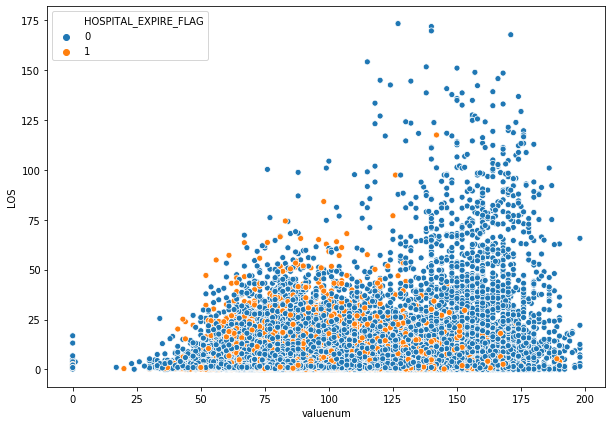

In [108]:
# heart_rate
adm_hr = adm_icu.merge(heart_rate, on=['HADM_ID', 'SUBJECT_ID'])
print(adm_hr['valuenum'].describe())
adm_hr = adm_hr[adm_hr['valuenum']<200]
plot(adm_hr[['valuenum']])
f, a = plt.subplots(figsize=(10, 7))
a = sns.scatterplot(x='valuenum', y='LOS', data=adm_hr, hue='HOSPITAL_EXPIRE_FLAG')

corr_l = adm_hr['valuenum'].corr(adm_hr['LOS'], method='pearson')
corr_m = adm_hr['valuenum'].corr(adm_hr['HOSPITAL_EXPIRE_FLAG'], method='pearson')
LOS_corr.append(corr_l)
M_corr.append(corr_m)
name.append('heart_rate')
print("Pearson Correlation of HeartRate and LOS: ", corr_l)
print("Pearson Correlation of HeartRate and HOSPITAL_EXPIRE_FLAG: ", corr_m)

In [53]:
# adm_hr = adm_hr[['SUBJECT_ID', 'HADM_ID', 'valuenum']].rename(columns={'valuenum':'heart_rate'})

count    51782.000000
mean        36.502624
std          2.687091
min        -17.777778
25%         36.111111
50%         36.666667
75%         37.166668
max         41.000002
Name: valuenum, dtype: float64


Pearson Correlation of Temperature and LOS:  0.05562663186825754
Pearson Correlation of Temperature and HOSPITAL_EXPIRE_FLAG:  -0.022639817934576454


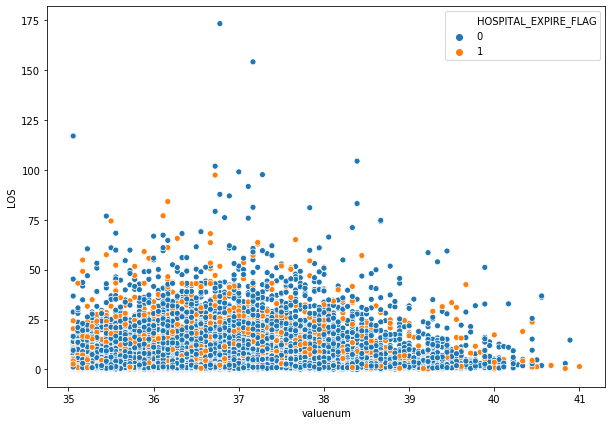

In [109]:
# temperature

adm_temp = adm_icu.merge(temperature, on=['HADM_ID', 'SUBJECT_ID'])
adm_temp['valuenum'] = 5/9 * (adm_temp['valuenum']-32)
print(adm_temp['valuenum'].describe())
adm_temp = adm_temp[adm_temp['valuenum']>35]
plot(adm_temp[['valuenum']])
f, a = plt.subplots(figsize=(10, 7))
a = sns.scatterplot(x='valuenum', y='LOS', data=adm_temp, hue='HOSPITAL_EXPIRE_FLAG')

corr_l = adm_temp['valuenum'].corr(adm_temp['LOS'], method='pearson')
corr_m = adm_temp['valuenum'].corr(adm_temp['HOSPITAL_EXPIRE_FLAG'], method='pearson')
LOS_corr.append(corr_l)
M_corr.append(corr_m)
name.append('temperature')
print("Pearson Correlation of Temperature and LOS: ", corr_l)
print("Pearson Correlation of Temperature and HOSPITAL_EXPIRE_FLAG: ", corr_m)
# adm_temp = adm_temp[['SUBJECT_ID', 'HADM_ID', 'valuenum']].rename(columns={'valuenum':'temperature'})

count    28397.000000
mean       119.924781
std         34.410503
min        -10.000000
25%        103.000000
50%        120.000000
75%        139.000000
max        289.000000
Name: valuenum, dtype: float64


Pearson Correlation of Arterial Blood Pressure and LOS:  0.0016147178289354237
Pearson Correlation of Arterial Blood Pressure and HOSPITAL_EXPIRE_FLAG:  -0.004815896678694113


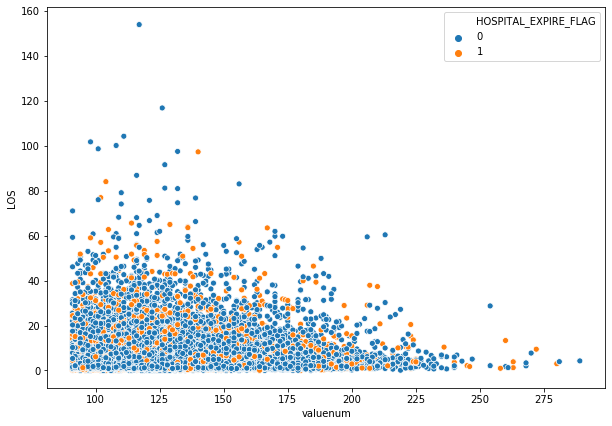

In [110]:
# arterial_bp
adm_bp = adm_icu.merge(arterial_bp, on=['HADM_ID', 'SUBJECT_ID'])
print(adm_bp['valuenum'].describe())
adm_bp = adm_bp[adm_bp['valuenum']>90]
plot(adm_bp[['valuenum']])
f, a = plt.subplots(figsize=(10, 7))
a = sns.scatterplot(x='valuenum', y='LOS', data=adm_bp, hue='HOSPITAL_EXPIRE_FLAG')

corr_l = adm_bp['valuenum'].corr(adm_bp['LOS'], method='pearson')
corr_m = adm_bp['valuenum'].corr(adm_bp['HOSPITAL_EXPIRE_FLAG'], method='pearson')
LOS_corr.append(corr_l)
M_corr.append(corr_m)
name.append('arterial_bp')
print("Pearson Correlation of Arterial Blood Pressure and LOS: ", corr_l)
print("Pearson Correlation of Arterial Blood Pressure and HOSPITAL_EXPIRE_FLAG: ", corr_m)
# adm_bp = adm_bp[['SUBJECT_ID', 'HADM_ID', 'valuenum']].rename(columns={'valuenum':'blood_pressure'})

count    51782.000000
mean        97.704723
std          4.836764
min          0.000000
25%         97.000000
50%         98.000000
75%         98.900002
max        105.800003
Name: valuenum, dtype: float64


Pearson Correlation of GCS Eye opening and LOS:  0.0330252452553661
Pearson Correlation of GCS Eye opening and HOSPITAL_EXPIRE_FLAG:  -0.07700343288451295


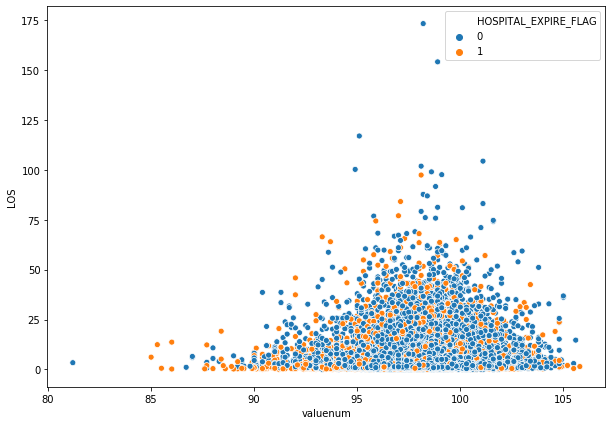

In [111]:
# GCS Eye opening

adm_eye = adm_icu.merge(temperature, on=['HADM_ID', 'SUBJECT_ID'])

print(adm_eye['valuenum'].describe())
adm_eye = adm_eye[adm_eye['valuenum']>80]
plot(adm_eye[['valuenum']])
f, a = plt.subplots(figsize=(10, 7))
a = sns.scatterplot(x='valuenum', y='LOS', data=adm_eye, hue='HOSPITAL_EXPIRE_FLAG')

corr_l = adm_eye['valuenum'].corr(adm_eye['LOS'], method='pearson')
corr_m = adm_eye['valuenum'].corr(adm_eye['HOSPITAL_EXPIRE_FLAG'], method='pearson')
LOS_corr.append(corr_l)
M_corr.append(corr_m)
name.append('arterial_bp')
print("Pearson Correlation of GCS Eye opening and LOS: ", corr_l)
print("Pearson Correlation of GCS Eye opening and HOSPITAL_EXPIRE_FLAG: ", corr_m)

count    52522.000000
mean         3.321884
std          1.896717
min          1.000000
25%          1.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: valuenum, dtype: float64


Pearson Correlation of GCS Verbol Responses and LOS:  -0.15543064128659004
Pearson Correlation of GCS Verbol Responses and HOSPITAL_EXPIRE_FLAG:  -0.10504694365345472


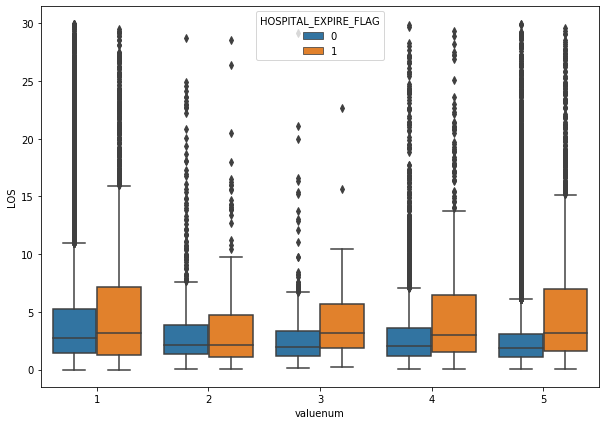

In [112]:
# GCS Verbol Responses

adm_vr = adm_icu.merge(gcs_vr, on=['HADM_ID', 'SUBJECT_ID'])

print(adm_vr['valuenum'].describe())
# adm_vr = adm_vr[adm_vr['valuenum']>80]
plot(adm_vr[['valuenum']])
f, a = plt.subplots(figsize=(10, 7))
data = adm_vr[adm_vr['LOS']<=30]
a = sns.boxplot(x='valuenum', y='LOS', data=data, hue='HOSPITAL_EXPIRE_FLAG')

corr_l = adm_vr['valuenum'].corr(adm_vr['LOS'], method='pearson')
corr_m = adm_vr['valuenum'].corr(adm_vr['HOSPITAL_EXPIRE_FLAG'], method='pearson')
LOS_corr.append(corr_l)
M_corr.append(corr_m)
name.append('arterial_bp')
print("Pearson Correlation of GCS Verbol Responses and LOS: ", corr_l)
print("Pearson Correlation of GCS Verbol Responses and HOSPITAL_EXPIRE_FLAG: ", corr_m)

count    52517.000000
mean         4.850125
std          1.915722
min          1.000000
25%          5.000000
50%          6.000000
75%          6.000000
max          6.000000
Name: valuenum, dtype: float64


Pearson Correlation of GCS Motor Responses and LOS:  -0.08776051808115057
Pearson Correlation of GCS Motor Responses and HOSPITAL_EXPIRE_FLAG:  -0.0750002546887163


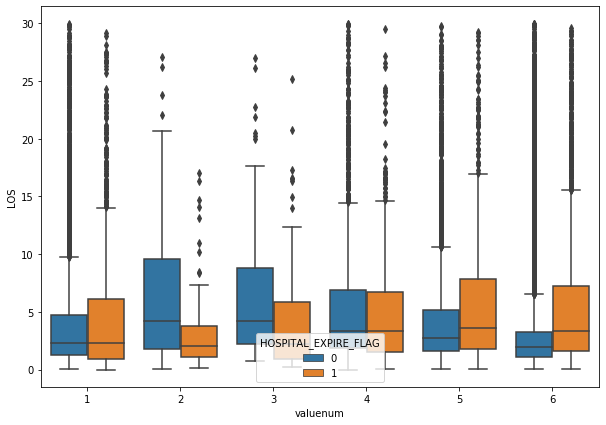

In [113]:
# GCS Motor Responses

adm_mr = adm_icu.merge(gcs_mr, on=['HADM_ID', 'SUBJECT_ID'])

print(adm_mr['valuenum'].describe())
# adm_vr = adm_vr[adm_vr['valuenum']>80]
plot(adm_mr[['valuenum']])
f, a = plt.subplots(figsize=(10, 7))
data = adm_mr[adm_mr['LOS']<=30]
a = sns.boxplot(x='valuenum', y='LOS', data=data, hue='HOSPITAL_EXPIRE_FLAG')

corr_l = adm_mr['valuenum'].corr(adm_mr['LOS'], method='pearson')
corr_m = adm_mr['valuenum'].corr(adm_mr['HOSPITAL_EXPIRE_FLAG'], method='pearson')
LOS_corr.append(corr_l)
M_corr.append(corr_m)
name.append('gcs motor responses')
print("Pearson Correlation of GCS Motor Responses and LOS: ", corr_l)
print("Pearson Correlation of GCS Motor Responses and HOSPITAL_EXPIRE_FLAG: ", corr_m)

count    44700.000000
mean       248.516226
std        294.400831
min          0.000000
25%         75.000000
50%        150.000000
75%        300.000000
max       7300.000000
Name: valuenum, dtype: float64


Pearson Correlation of Foley and LOS:  -0.024445626236450257
Pearson Correlation of Foley and HOSPITAL_EXPIRE_FLAG:  -0.048669084148106924


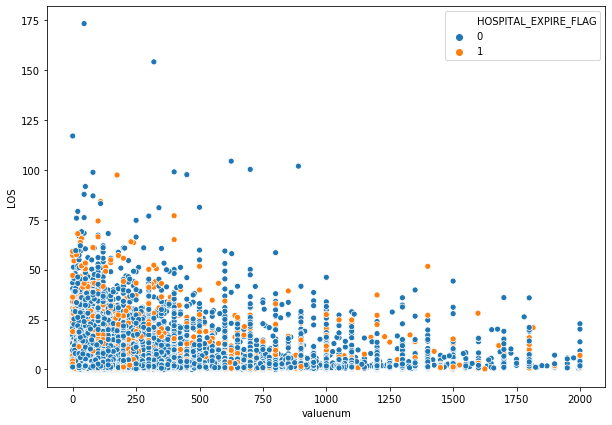

In [114]:
# Foley

adm_foley = adm_icu.merge(foley, on=['HADM_ID', 'SUBJECT_ID'])

print(adm_foley['valuenum'].describe())
adm_foley = adm_foley[adm_foley['valuenum']<=2000]
plot(adm_foley[['valuenum']])
f, a = plt.subplots(figsize=(10, 7))

a = sns.scatterplot(x='valuenum', y='LOS', data=adm_foley, hue='HOSPITAL_EXPIRE_FLAG')

corr_l = adm_foley['valuenum'].corr(adm_foley['LOS'], method='pearson')
corr_m = adm_foley['valuenum'].corr(adm_foley['HOSPITAL_EXPIRE_FLAG'], method='pearson')
LOS_corr.append(corr_l)
M_corr.append(corr_m)
name.append('foley')
print("Pearson Correlation of Foley and LOS: ", corr_l)
print("Pearson Correlation of Foley and HOSPITAL_EXPIRE_FLAG: ", corr_m)

count    16243.000000
mean       290.997002
std        219.772153
min          0.000000
25%        150.000000
50%        250.000000
75%        400.000000
max       3775.000000
Name: valuenum, dtype: float64


Pearson Correlation of Void and LOS:  -0.10801319031134843
Pearson Correlation of Void and HOSPITAL_EXPIRE_FLAG:  -0.10567533287606329


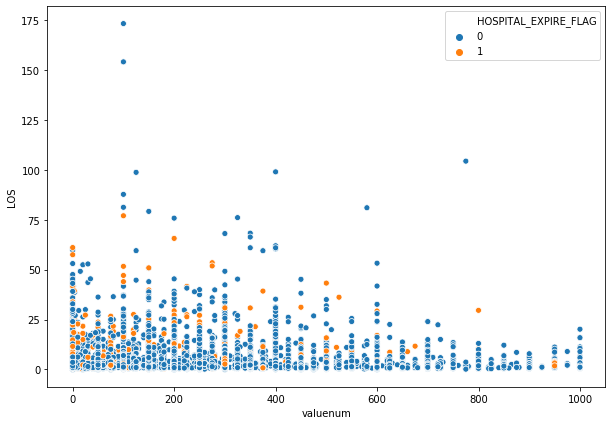

In [115]:
# Void

adm_void = adm_icu.merge(void, on=['HADM_ID', 'SUBJECT_ID'])

print(adm_void['valuenum'].describe())
adm_void = adm_void[adm_void['valuenum']<=1000]
plot(adm_void[['valuenum']])
f, a = plt.subplots(figsize=(10, 7))

a = sns.scatterplot(x='valuenum', y='LOS', data=adm_void, hue='HOSPITAL_EXPIRE_FLAG')

corr_l = adm_void['valuenum'].corr(adm_void['LOS'], method='pearson')
corr_m = adm_void['valuenum'].corr(adm_void['HOSPITAL_EXPIRE_FLAG'], method='pearson')
LOS_corr.append(corr_l)
M_corr.append(corr_m)
name.append('Void')
print("Pearson Correlation of Void and LOS: ", corr_l)
print("Pearson Correlation of Void and HOSPITAL_EXPIRE_FLAG: ", corr_m)

count    1687.000000
mean      309.361589
std       305.283768
min         0.000000
25%       100.000000
50%       250.000000
75%       400.000000
max      3400.000000
Name: valuenum, dtype: float64


Pearson Correlation of Condom Cath and LOS:  -0.19539225080318753
Pearson Correlation of Condom Cath and HOSPITAL_EXPIRE_FLAG:  -0.10713389249319097


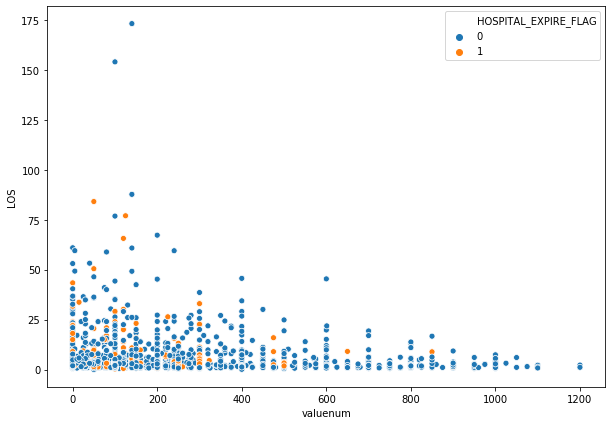

In [116]:
# Condom Cath

adm_cc = adm_icu.merge(condom_cath, on=['HADM_ID', 'SUBJECT_ID'])

print(adm_cc['valuenum'].describe())
adm_cc = adm_cc[adm_cc['valuenum']<=1200]
plot(adm_cc[['valuenum']])
f, a = plt.subplots(figsize=(10, 7))

a = sns.scatterplot(x='valuenum', y='LOS', data=adm_cc, hue='HOSPITAL_EXPIRE_FLAG')

corr_l = adm_cc['valuenum'].corr(adm_cc['LOS'], method='pearson')
corr_m = adm_cc['valuenum'].corr(adm_cc['HOSPITAL_EXPIRE_FLAG'], method='pearson')
LOS_corr.append(corr_l)
M_corr.append(corr_m)
name.append('condom cath')
print("Pearson Correlation of Condom Cath and LOS: ", corr_l)
print("Pearson Correlation of Condom Cath and HOSPITAL_EXPIRE_FLAG: ", corr_m)

count     169.000000
mean      258.414201
std       349.365028
min         0.000000
25%        50.000000
50%       160.000000
75%       325.000000
max      3200.000000
Name: valuenum, dtype: float64


Pearson Correlation of Suprapubic and LOS:  -0.07996700975628149
Pearson Correlation of Suprapubic and HOSPITAL_EXPIRE_FLAG:  -0.08907236400241088


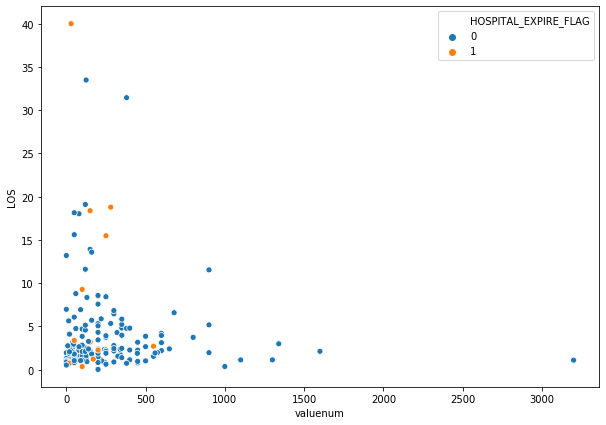

In [117]:
# Suprapubic

adm_sup = adm_icu.merge(suprapubic, on=['HADM_ID', 'SUBJECT_ID'])

print(adm_sup['valuenum'].describe())
# adm_sup = adm_sup[adm_sup['valuenum']<=1200]
plot(adm_sup[['valuenum']])
f, a = plt.subplots(figsize=(10, 7))

a = sns.scatterplot(x='valuenum', y='LOS', data=adm_sup, hue='HOSPITAL_EXPIRE_FLAG')

corr_l = adm_sup['valuenum'].corr(adm_sup['LOS'], method='pearson')
corr_m = adm_sup['valuenum'].corr(adm_sup['HOSPITAL_EXPIRE_FLAG'], method='pearson')
LOS_corr.append(corr_l)
M_corr.append(corr_m)
name.append('Suprapubic')
print("Pearson Correlation of Suprapubic and LOS: ", corr_l)
print("Pearson Correlation of Suprapubic and HOSPITAL_EXPIRE_FLAG: ", corr_m)

count    158.000000
mean     175.474684
std      160.491669
min        0.000000
25%       50.000000
50%      150.000000
75%      257.500000
max      900.000000
Name: valuenum, dtype: float64


Pearson Correlation of R Nephrostomy and LOS:  -0.07946358942235071
Pearson Correlation of R Nephrostomy and HOSPITAL_EXPIRE_FLAG:  -0.012520025901973972


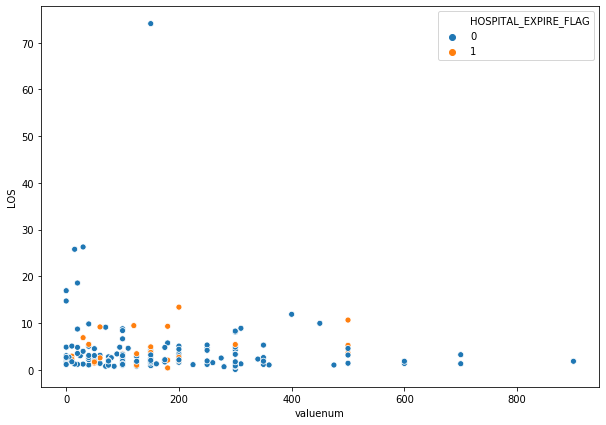

In [118]:
# R Nephrostomy

adm_rneph = adm_icu.merge(r_neph, on=['HADM_ID', 'SUBJECT_ID'])

print(adm_rneph['valuenum'].describe())
# adm_sup = adm_sup[adm_sup['valuenum']<=1200]
plot(adm_rneph[['valuenum']])
f, a = plt.subplots(figsize=(10, 7))

a = sns.scatterplot(x='valuenum', y='LOS', data=adm_rneph, hue='HOSPITAL_EXPIRE_FLAG')

corr_l = adm_rneph['valuenum'].corr(adm_rneph['LOS'], method='pearson')
corr_m = adm_rneph['valuenum'].corr(adm_rneph['HOSPITAL_EXPIRE_FLAG'], method='pearson')
LOS_corr.append(corr_l)
M_corr.append(corr_m)
name.append('R Nephrostomy')
print("Pearson Correlation of R Nephrostomy and LOS: ", corr_l)
print("Pearson Correlation of R Nephrostomy and HOSPITAL_EXPIRE_FLAG: ", corr_m)

count     139.000000
mean      176.611511
std       179.497588
min         0.000000
25%        50.000000
50%       125.000000
75%       225.000000
max      1200.000000
Name: valuenum, dtype: float64


Pearson Correlation of L Nephrostomy and LOS:  -0.08629078509437926
Pearson Correlation of L Nephrostomy and HOSPITAL_EXPIRE_FLAG:  -0.09605750647453763


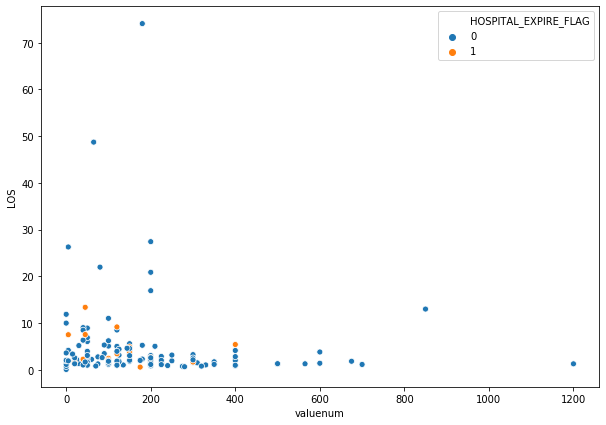

In [119]:
# L Nephrostomy

adm_lneph = adm_icu.merge(l_neph, on=['HADM_ID', 'SUBJECT_ID'])

print(adm_lneph['valuenum'].describe())
# adm_sup = adm_sup[adm_sup['valuenum']<=1200]
plot(adm_lneph[['valuenum']])
f, a = plt.subplots(figsize=(10, 7))

a = sns.scatterplot(x='valuenum', y='LOS', data=adm_lneph, hue='HOSPITAL_EXPIRE_FLAG')

corr_l = adm_lneph['valuenum'].corr(adm_lneph['LOS'], method='pearson')
corr_m = adm_lneph['valuenum'].corr(adm_lneph['HOSPITAL_EXPIRE_FLAG'], method='pearson')
LOS_corr.append(corr_l)
M_corr.append(corr_m)
name.append('L Nephrostomy')
print("Pearson Correlation of L Nephrostomy and LOS: ", corr_l)
print("Pearson Correlation of L Nephrostomy and HOSPITAL_EXPIRE_FLAG: ", corr_m)

count     401.000000
mean      231.251870
std       274.824578
min         0.000000
25%        30.000000
50%       100.000000
75%       380.000000
max      1550.000000
Name: valuenum, dtype: float64


Pearson Correlation of Straight Cath and LOS:  -0.1815808550444203
Pearson Correlation of Straight Cath and HOSPITAL_EXPIRE_FLAG:  -0.29160873223593015


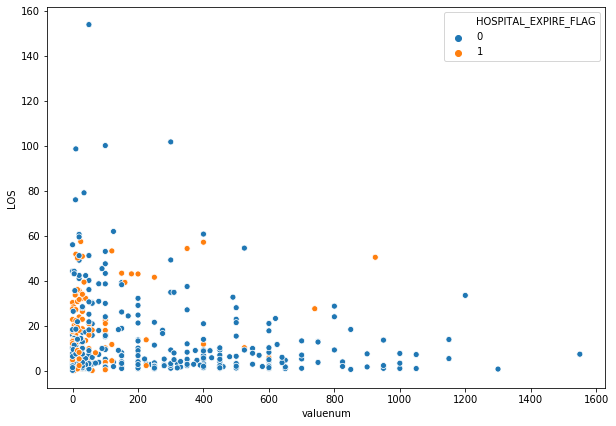

In [120]:
# Straight Cath

adm_sc = adm_icu.merge(straight_cath, on=['HADM_ID', 'SUBJECT_ID'])

print(adm_sc['valuenum'].describe())
# adm_sup = adm_sup[adm_sup['valuenum']<=1200]
plot(adm_sc[['valuenum']])
f, a = plt.subplots(figsize=(10, 7))

a = sns.scatterplot(x='valuenum', y='LOS', data=adm_sc, hue='HOSPITAL_EXPIRE_FLAG')

corr_l = adm_sc['valuenum'].corr(adm_sc['LOS'], method='pearson')
corr_m = adm_sc['valuenum'].corr(adm_sc['HOSPITAL_EXPIRE_FLAG'], method='pearson')
LOS_corr.append(corr_l)
M_corr.append(corr_m)
name.append('Straight Cath')
print("Pearson Correlation of Straight Cath and LOS: ", corr_l)
print("Pearson Correlation of Straight Cath and HOSPITAL_EXPIRE_FLAG: ", corr_m)

count     161.000000
mean      216.037267
std       217.753384
min         0.000000
25%        60.000000
50%       150.000000
75%       300.000000
max      1225.000000
Name: valuenum, dtype: float64


Pearson Correlation of Ileoconduit and LOS:  -0.1985473850580607
Pearson Correlation of Ileoconduit and HOSPITAL_EXPIRE_FLAG:  -0.12429339901858616


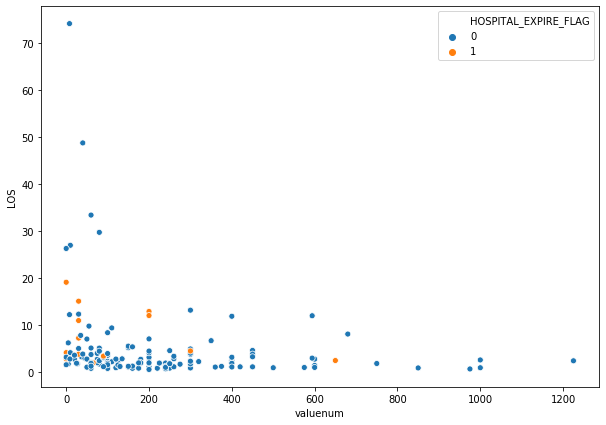

In [121]:
# Ileoconduit

adm_il = adm_icu.merge(ileoconduit, on=['HADM_ID', 'SUBJECT_ID'])

print(adm_il['valuenum'].describe())
# adm_sup = adm_sup[adm_sup['valuenum']<=1200]
plot(adm_il[['valuenum']])
f, a = plt.subplots(figsize=(10, 7))

a = sns.scatterplot(x='valuenum', y='LOS', data=adm_il, hue='HOSPITAL_EXPIRE_FLAG')

corr_l = adm_il['valuenum'].corr(adm_il['LOS'], method='pearson')
corr_m = adm_il['valuenum'].corr(adm_il['HOSPITAL_EXPIRE_FLAG'], method='pearson')
LOS_corr.append(corr_l)
M_corr.append(corr_m)
name.append('Ileoconduit')
print("Pearson Correlation of Ileoconduit and LOS: ", corr_l)
print("Pearson Correlation of Ileoconduit and HOSPITAL_EXPIRE_FLAG: ", corr_m)

count    51587.000000
mean       122.937689
std         26.361429
min          0.000000
25%        105.000000
50%        121.000000
75%        139.000000
max        265.000000
Name: valuenum, dtype: float64


Pearson Correlation of Non Invasive Blood Pressure Systolic and LOS:  -0.04343964674507301
Pearson Correlation of Non Invasive Blood Pressure Systolic and HOSPITAL_EXPIRE_FLAG:  -0.06389863078427319


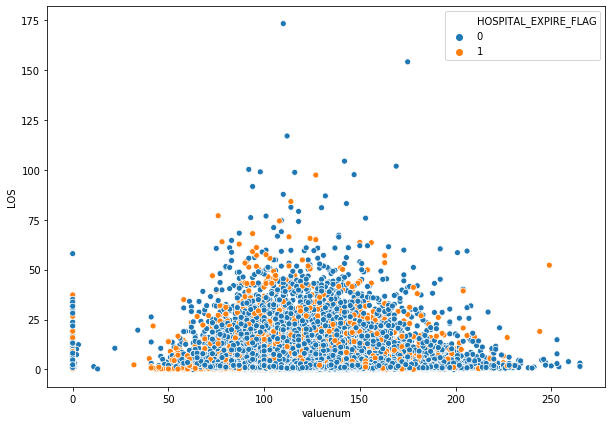

In [122]:
# Non Invasive Blood Pressure Systolic

adm_nibps = adm_icu.merge(nibps, on=['HADM_ID', 'SUBJECT_ID'])

print(adm_nibps['valuenum'].describe())
# adm_sup = adm_sup[adm_sup['valuenum']<=1200]
plot(adm_nibps[['valuenum']])
f, a = plt.subplots(figsize=(10, 7))

a = sns.scatterplot(x='valuenum', y='LOS', data=adm_nibps, hue='HOSPITAL_EXPIRE_FLAG')

corr_l = adm_nibps['valuenum'].corr(adm_nibps['LOS'], method='pearson')
corr_m = adm_nibps['valuenum'].corr(adm_nibps['HOSPITAL_EXPIRE_FLAG'], method='pearson')
LOS_corr.append(corr_l)
M_corr.append(corr_m)
name.append('nibps')
print("Pearson Correlation of Non Invasive Blood Pressure Systolic and LOS: ", corr_l)
print("Pearson Correlation of Non Invasive Blood Pressure Systolic and HOSPITAL_EXPIRE_FLAG: ", corr_m)

count    15898.000000
mean        71.008237
std         31.590653
min          0.000000
25%         50.000000
50%         70.000000
75%        100.000000
max       1001.000000
Name: valuenum, dtype: float64


Pearson Correlation of FiO2 and LOS:  -0.21016929859036476
Pearson Correlation of FiO2 and HOSPITAL_EXPIRE_FLAG:  0.05379532306815177


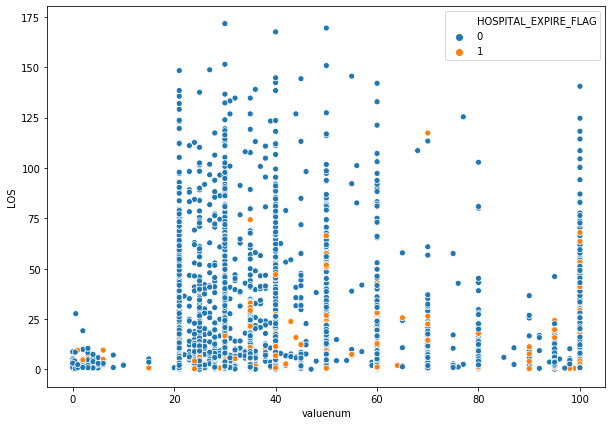

In [123]:
# FiO2

adm_fio2 = adm_icu.merge(fio2, on='HADM_ID')

print(adm_fio2['valuenum'].describe())
adm_fio2 = adm_fio2[adm_fio2['valuenum']<=100]
plot(adm_fio2[['valuenum']])
f, a = plt.subplots(figsize=(10, 7))

a = sns.scatterplot(x='valuenum', y='LOS', data=adm_fio2, hue='HOSPITAL_EXPIRE_FLAG')

corr_l = adm_fio2['valuenum'].corr(adm_fio2['LOS'], method='pearson')
corr_m = adm_fio2['valuenum'].corr(adm_fio2['HOSPITAL_EXPIRE_FLAG'], method='pearson')
LOS_corr.append(corr_l)
M_corr.append(corr_m)
name.append('FiO2')
print("Pearson Correlation of FiO2 and LOS: ", corr_l)
print("Pearson Correlation of FiO2 and HOSPITAL_EXPIRE_FLAG: ", corr_m)

count    38906.000000
mean       188.670462
std        140.935931
min          0.000000
25%         75.000000
50%        129.000000
75%        292.000000
max        797.000000
Name: valuenum, dtype: float64


Pearson Correlation of PO2 and LOS:  -0.14587416399022218
Pearson Correlation of PO2 and HOSPITAL_EXPIRE_FLAG:  -0.09190953412131588


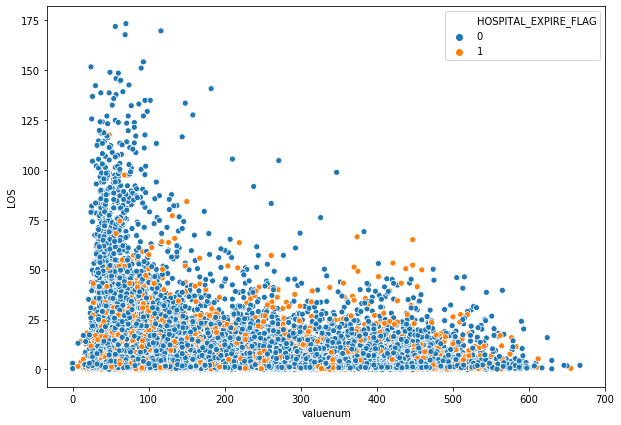

In [124]:
# PO2

adm_po2 = adm_icu.merge(po2, on=['HADM_ID', 'SUBJECT_ID'])

print(adm_po2['valuenum'].describe())
adm_po2 = adm_po2[adm_po2['valuenum']<=700]
plot(adm_po2[['valuenum']])
f, a = plt.subplots(figsize=(10, 7))

a = sns.scatterplot(x='valuenum', y='LOS', data=adm_po2, hue='HOSPITAL_EXPIRE_FLAG')

corr_l = adm_po2['valuenum'].corr(adm_po2['LOS'], method='pearson')
corr_m = adm_po2['valuenum'].corr(adm_po2['HOSPITAL_EXPIRE_FLAG'], method='pearson')
LOS_corr.append(corr_l)
M_corr.append(corr_m)
name.append('PO2')
print("Pearson Correlation of PO2 and LOS: ", corr_l)
print("Pearson Correlation of PO2 and HOSPITAL_EXPIRE_FLAG: ", corr_m)

count    22019.000000
mean        65.620042
std         29.109860
min          0.000000
25%         40.000000
50%         56.000000
75%        100.000000
max        800.000000
Name: valuenum, dtype: float64


Pearson Correlation of oxygen and LOS:  -0.17556743173350461
Pearson Correlation of oxygen and HOSPITAL_EXPIRE_FLAG:  0.11123696261040915


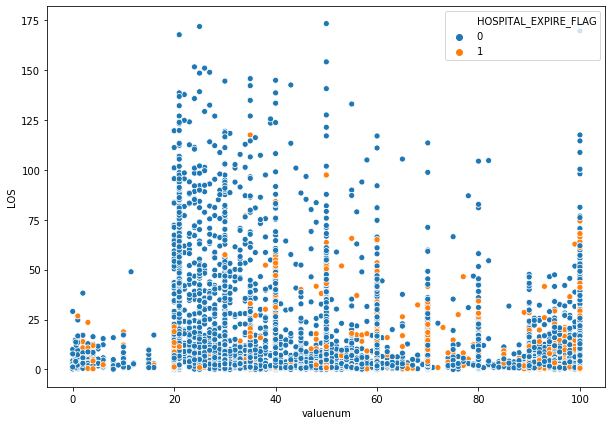

In [125]:
# oxygen
adm_o = adm_icu.merge(oxygen, on=['HADM_ID', 'SUBJECT_ID'])
print(adm_o['valuenum'].describe())
adm_o = adm_o[adm_o['valuenum']<=100]

plot(adm_o[['valuenum']])
f, a = plt.subplots(figsize=(10, 7))

a = sns.scatterplot(x='valuenum', y='LOS', data=adm_o, hue='HOSPITAL_EXPIRE_FLAG')

corr_l = adm_o['valuenum'].corr(adm_o['LOS'], method='pearson')
corr_m = adm_o['valuenum'].corr(adm_o['HOSPITAL_EXPIRE_FLAG'], method='pearson')
LOS_corr.append(corr_l)
M_corr.append(corr_m)
name.append('oxygen')
print("Pearson Correlation of oxygen and LOS: ", corr_l)
print("Pearson Correlation of oxygen and HOSPITAL_EXPIRE_FLAG: ", corr_m)
# adm_o = adm_o[['SUBJECT_ID', 'HADM_ID', 'valuenum']].rename(columns={'valuenum':'oxygen'})

count    60390.000000
mean        12.128375
std         10.411086
min          0.000000
25%          7.500000
50%         10.500000
75%         14.800000
max        846.700012
Name: valuenum, dtype: float64


Pearson Correlation of White Blood Cell and LOS:  -0.006805720670781896
Pearson Correlation of White Blood Cell and HOSPITAL_EXPIRE_FLAG:  0.0651552108983932


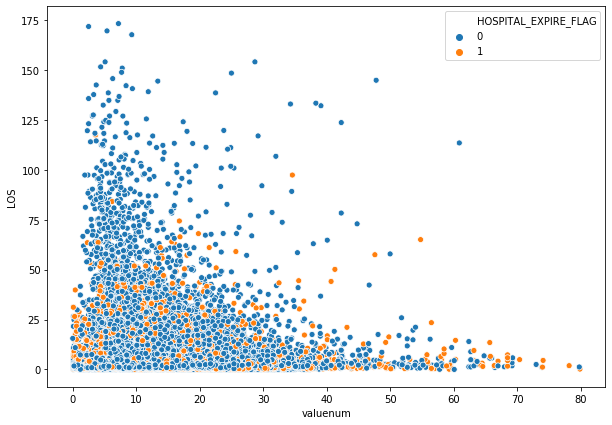

In [126]:
# wbc
wbc_t = wbc.append(wbc_count)
adm_wbc = adm_icu.merge(wbc_t, on=['HADM_ID', 'SUBJECT_ID'])

print(adm_wbc['valuenum'].describe())
adm_wbc = adm_wbc[adm_wbc['valuenum']<=80]
plot(adm_wbc[['valuenum']])
f, a = plt.subplots(figsize=(10, 7))

a = sns.scatterplot(x='valuenum', y='LOS', data=adm_wbc, hue='HOSPITAL_EXPIRE_FLAG')

corr_l = adm_wbc['valuenum'].corr(adm_wbc['LOS'], method='pearson')
corr_m = adm_wbc['valuenum'].corr(adm_wbc['HOSPITAL_EXPIRE_FLAG'], method='pearson')
LOS_corr.append(corr_l)
M_corr.append(corr_m)
name.append('White Blood Cell')
print("Pearson Correlation of White Blood Cell and LOS: ", corr_l)
print("Pearson Correlation of White Blood Cell and HOSPITAL_EXPIRE_FLAG: ", corr_m)
# adm_wbc = adm_wbc[['SUBJECT_ID', 'HADM_ID', 'valuenum']].rename(columns={'valuenum':'white_blood_cell'})

count    53789.000000
mean        27.313689
std         22.033470
min          1.000000
25%         14.000000
50%         20.000000
75%         32.000000
max        274.000000
Name: valuenum, dtype: float64


Pearson Correlation of Urea Nitrogen and LOS:  0.03364338817339587
Pearson Correlation of Urea Nitrogen and HOSPITAL_EXPIRE_FLAG:  0.15287954807695966


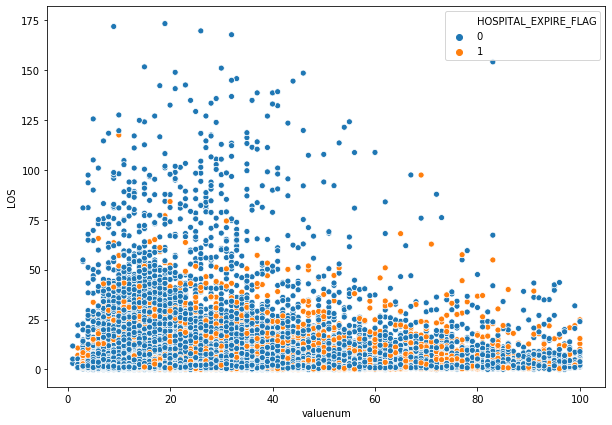

In [127]:
# urea_n
adm_urea = adm_icu.merge(urea_n, on=['HADM_ID', 'SUBJECT_ID'])

print(adm_urea['valuenum'].describe())
adm_urea = adm_urea[adm_urea['valuenum']<=100]
plot(adm_urea[['valuenum']])
f, a = plt.subplots(figsize=(10, 7))

a = sns.scatterplot(x='valuenum', y='LOS', data=adm_urea, hue='HOSPITAL_EXPIRE_FLAG')

corr_l = adm_urea['valuenum'].corr(adm_urea['LOS'], method='pearson')
corr_m = adm_urea['valuenum'].corr(adm_urea['HOSPITAL_EXPIRE_FLAG'], method='pearson')
LOS_corr.append(corr_l)
M_corr.append(corr_m)
name.append('Urea Nitrogen')
print("Pearson Correlation of Urea Nitrogen and LOS: ", corr_l)
print("Pearson Correlation of Urea Nitrogen and HOSPITAL_EXPIRE_FLAG: ", corr_m)
# adm_urea = adm_urea[['SUBJECT_ID', 'HADM_ID', 'valuenum']].rename(columns={'valuenum':'urea'})

count    55640.000000
mean        24.180117
std          4.899362
min          2.000000
25%         22.000000
50%         24.000000
75%         27.000000
max         56.000000
Name: valuenum, dtype: float64


Pearson Correlation of Bicarbonate and LOS:  -0.06936849426264478
Pearson Correlation of Bicarbonate and HOSPITAL_EXPIRE_FLAG:  -0.07729209291850667


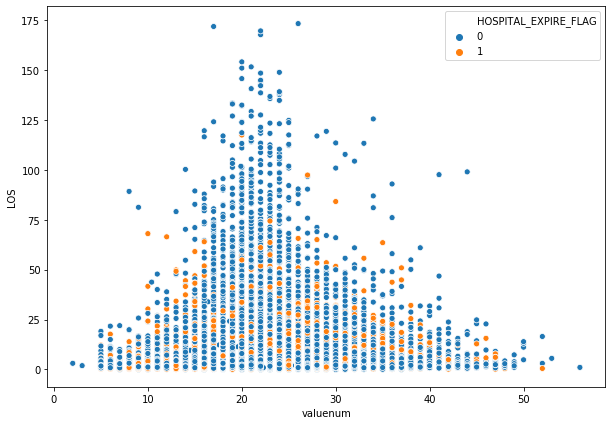

In [128]:
# bicarb
adm_bicarb = adm_icu.merge(bicarb, on=['HADM_ID', 'SUBJECT_ID'])

print(adm_bicarb['valuenum'].describe())
# adm_bicarb = adm_bicarb[adm_bicarb['valuenum']<=100]
plot(adm_bicarb[['valuenum']])
f, a = plt.subplots(figsize=(10, 7))

a = sns.scatterplot(x='valuenum', y='LOS', data=adm_bicarb, hue='HOSPITAL_EXPIRE_FLAG')

corr_l = adm_bicarb['valuenum'].corr(adm_bicarb['LOS'], method='pearson')
corr_m = adm_bicarb['valuenum'].corr(adm_bicarb['HOSPITAL_EXPIRE_FLAG'], method='pearson')
LOS_corr.append(corr_l)
M_corr.append(corr_m)
name.append('Bicarbonate')
print("Pearson Correlation of Bicarbonate and LOS: ", corr_l)
print("Pearson Correlation of Bicarbonate and HOSPITAL_EXPIRE_FLAG: ", corr_m)
# adm_bicarb = adm_bicarb[['SUBJECT_ID', 'HADM_ID', 'valuenum']].rename(columns={'valuenum':'bicarbonate'})

count    55672.000000
mean       138.188174
std          5.075038
min         74.000000
25%        136.000000
50%        139.000000
75%        141.000000
max        180.000000
Name: valuenum, dtype: float64


Pearson Correlation of sodium and LOS:  0.018711801358746342
Pearson Correlation of sodium and HOSPITAL_EXPIRE_FLAG:  -0.035598863962679035


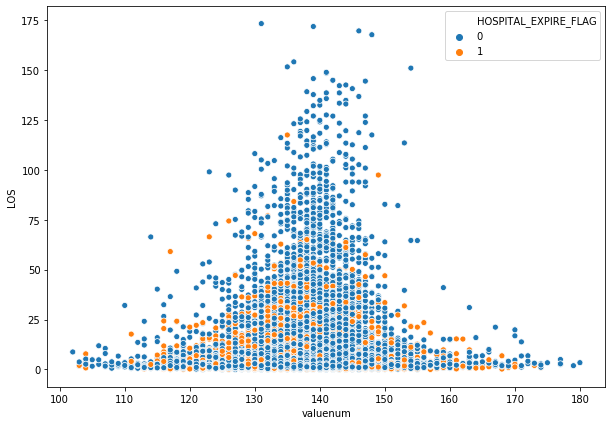

In [129]:
# sodium
adm_sodium = adm_icu.merge(sodium, on=['HADM_ID', 'SUBJECT_ID'])
print(adm_sodium['valuenum'].describe())
adm_sodium = adm_sodium[adm_sodium['valuenum']>=100]
plot(adm_sodium[['valuenum']])
f, a = plt.subplots(figsize=(10, 7))

a = sns.scatterplot(x='valuenum', y='LOS', data=adm_sodium, hue='HOSPITAL_EXPIRE_FLAG')

corr_l = adm_sodium['valuenum'].corr(adm_sodium['LOS'], method='pearson')
corr_m = adm_sodium['valuenum'].corr(adm_sodium['HOSPITAL_EXPIRE_FLAG'], method='pearson')
LOS_corr.append(corr_l)
M_corr.append(corr_m)
name.append('sodium')
print("Pearson Correlation of sodium and LOS: ", corr_l)
print("Pearson Correlation of sodium and HOSPITAL_EXPIRE_FLAG: ", corr_m)
# adm_sodium = adm_sodium[['SUBJECT_ID', 'HADM_ID', 'valuenum']].rename(columns={'valuenum':'sodium'})

count    55684.000000
mean         4.356786
std          0.876543
min          1.500000
25%          3.800000
50%          4.200000
75%          4.700000
max         17.100000
Name: valuenum, dtype: float64


Pearson Correlation of potassium and LOS:  0.06803265562398485
Pearson Correlation of potassium and HOSPITAL_EXPIRE_FLAG:  0.035372425218525724


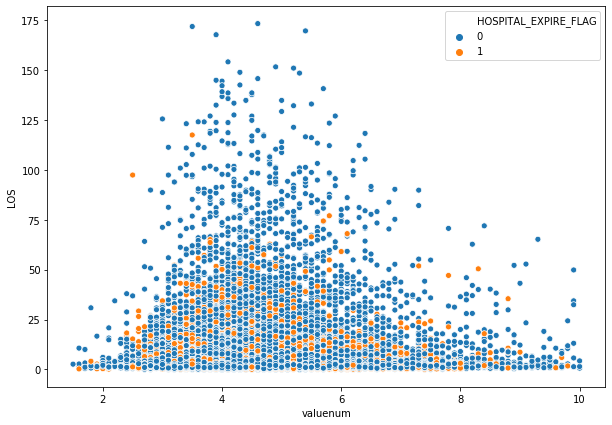

In [130]:
# potassium
adm_po = adm_icu.merge(potassium, on=['HADM_ID', 'SUBJECT_ID'])
print(adm_po['valuenum'].describe())
adm_po = adm_po[adm_po['valuenum']<=10]
plot(adm_po[['valuenum']])
f, a = plt.subplots(figsize=(10, 7))

a = sns.scatterplot(x='valuenum', y='LOS', data=adm_po, hue='HOSPITAL_EXPIRE_FLAG')

corr_l = adm_po['valuenum'].corr(adm_po['LOS'], method='pearson')
corr_m = adm_po['valuenum'].corr(adm_po['HOSPITAL_EXPIRE_FLAG'], method='pearson')
LOS_corr.append(corr_l)
M_corr.append(corr_m)
name.append('potassium')
print("Pearson Correlation of potassium and LOS: ", corr_l)
print("Pearson Correlation of potassium and HOSPITAL_EXPIRE_FLAG: ", corr_m)
# adm_po = adm_po[['SUBJECT_ID', 'HADM_ID', 'valuenum']].rename(columns={'valuenum':'potassium'})

count    31760.000000
mean         4.189562
std          0.878609
min          0.700000
25%          3.700000
50%          4.100000
75%          4.500000
max         18.000000
Name: valuenum, dtype: float64


Pearson Correlation of potassium whole blood and LOS:  -0.023699172905643395
Pearson Correlation of potassium whole blood and HOSPITAL_EXPIRE_FLAG:  0.07285153394126874


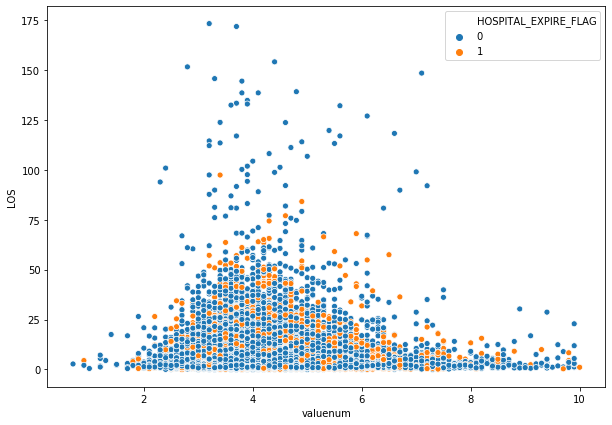

In [131]:
# potassium_wb
adm_powb = adm_icu.merge(potassium_wb, on=['HADM_ID', 'SUBJECT_ID'])
print(adm_powb['valuenum'].describe())
adm_powb = adm_powb[adm_powb['valuenum']<=10]
plot(adm_powb[['valuenum']])
f, a = plt.subplots(figsize=(10, 7))

a = sns.scatterplot(x='valuenum', y='LOS', data=adm_powb, hue='HOSPITAL_EXPIRE_FLAG')

corr_l = adm_powb['valuenum'].corr(adm_powb['LOS'], method='pearson')
corr_m = adm_powb['valuenum'].corr(adm_powb['HOSPITAL_EXPIRE_FLAG'], method='pearson')
LOS_corr.append(corr_l)
M_corr.append(corr_m)
name.append('potassium whole blood')
print("Pearson Correlation of potassium whole blood and LOS: ", corr_l)
print("Pearson Correlation of potassium whole blood and HOSPITAL_EXPIRE_FLAG: ", corr_m)
# adm_powb = adm_powb[['SUBJECT_ID', 'HADM_ID', 'valuenum']].rename(columns={'valuenum':'potassium_wb'})

count    42627.000000
mean         2.271041
std          4.024501
min          0.000000
25%          0.400000
50%          0.700000
75%          1.900000
max         82.800003
Name: valuenum, dtype: float64


Pearson Correlation of bilirubin and LOS:  0.10377054305086379
Pearson Correlation of bilirubin and HOSPITAL_EXPIRE_FLAG:  -0.06487311981505722


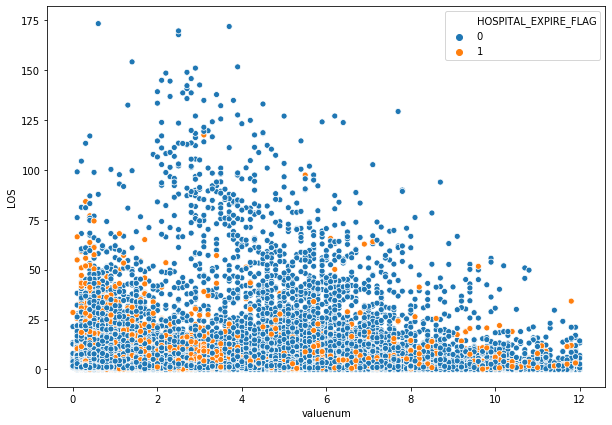

In [132]:
# bilirubin ??? 
adm_bil = adm_icu.merge(bilirubin, on=['HADM_ID', 'SUBJECT_ID'])
print(adm_bil['valuenum'].describe())
adm_bil = adm_bil[adm_bil['valuenum']<=12]
plot(adm_bil[['valuenum']])
f, a = plt.subplots(figsize=(10, 7))

a = sns.scatterplot(x='valuenum', y='LOS', data=adm_bil, hue='HOSPITAL_EXPIRE_FLAG')

corr_l = adm_bil['valuenum'].corr(adm_bil['LOS'], method='pearson')
corr_m = adm_bil['valuenum'].corr(adm_bil['HOSPITAL_EXPIRE_FLAG'], method='pearson')
LOS_corr.append(corr_l)
M_corr.append(corr_m)
name.append('bilirubin')
print("Pearson Correlation of bilirubin and LOS: ", corr_l)
print("Pearson Correlation of bilirubin and HOSPITAL_EXPIRE_FLAG: ", corr_m)
# adm_bil = adm_bil[['SUBJECT_ID', 'HADM_ID', 'valuenum']].rename(columns={'valuenum':'bilirubin'})

GridBox(id='1039', ...)

HADM_ID
100001    [2, 5, 9, 8, 17, 2, 8, 6, 2, 6, 9, 2, 5, 2, 11...
100003                        [8, 3, 11, 8, 6, 8, 6, 8, 15]
100006                       [7, 7, 7, 1, 2, 15, 4, 17, 17]
100007                                     [8, 8, 16, 7, 6]
100009    [6, 16, 6, 2, 2, 17, 6, 6, 17, 17, 3, 6, 2, 6,...
                                ...                        
199993                          [6, 6, 6, 6, 7, 6, 2, 7, 7]
199994                          [7, 6, 7, 6, 7, 6, 9, 6, 2]
199995                     [6, 13, 6, 4, 6, 6, 17, 6, 4, 4]
199998    [6, 16, 16, 6, 15, 6, 17, 17, 6, 6, 6, 6, 2, 7...
199999         [7, 7, 7, 9, 2, 15, 15, 6, 17, 15, 3, 17, 6]
Name: category, Length: 58976, dtype: object